In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [3]:
filename = 'fraudTrain.csv'

In [4]:
# import Train Dataset
path = '../dataset/midterm_dataset/'+filename
df = pd.read_csv(path)
print(df.shape)
df.head()

(1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<h1> Cleaning part

In [5]:
#select columns
df = df[df.columns[1:]]
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
# change columns type
df['dob'] = pd.to_datetime(df['dob'])
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [7]:
df.gender = df.gender.apply(lambda x: 1 if x == 'M' else 0)
df = df.rename(columns={'gender': 'is_male'})
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,is_male,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<AxesSubplot:>

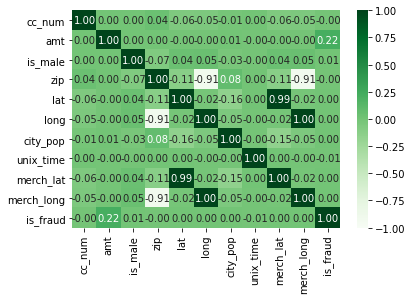

In [8]:
sns.heatmap(df.corr(),cbar=True,annot=True,fmt='.2f', cmap="Greens", vmin=-1, vmax=1)

<AxesSubplot:xlabel='lat', ylabel='long'>

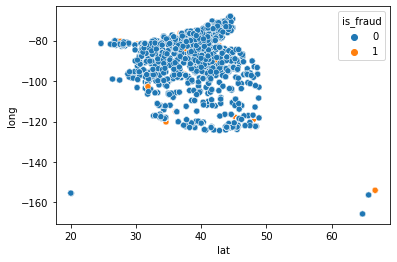

In [9]:
sns.scatterplot(data=df, x="lat", y="long", hue='is_fraud')

In [10]:
#combine columns
if 'state_city' not in df.columns.tolist(): 
    df["state_city"] = df['zip'].astype(str)+', '+df["city"] +', '+df["state"]
if 'full_name' not in df.columns.tolist():
    df['full_name'] = df['first']+' '+df['last']
    

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,is_male,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,state_city,full_name
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,"28654, Moravian Falls, NC",Jennifer Banks
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,"99160, Orient, WA",Stephanie Gill
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,"83252, Malad City, ID",Edward Sanchez
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,"59632, Boulder, MT",Jeremy White
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,"24433, Doe Hill, VA",Tyler Garcia


In [11]:
# age when during the trans_date    
if 'age' not in df.columns.tolist():
    df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

In [12]:
# convert to be range of time
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
if 'trans_time' not in df.columns.tolist():
    df['trans_time'] = pd.cut(df['trans_date_trans_time'].dt.hour, bins=b, labels=l, include_lowest=True)

In [13]:
df['tran_year'] = df['trans_date_trans_time'].dt.year
df['tran_month'] = df['trans_date_trans_time'].dt.month

In [14]:
df['tran_month'].value_counts()

5     146875
6     143811
3     143789
12    141060
4     134970
1     104727
2      97657
8      87359
7      86596
9      70652
11     70421
10     68758
Name: tran_month, dtype: int64

In [15]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,is_male,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,state_city,full_name,age,trans_time,tran_year,tran_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,"28654, Moravian Falls, NC",Jennifer Banks,31,Late Night,2019,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,"99160, Orient, WA",Stephanie Gill,41,Late Night,2019,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,"83252, Malad City, ID",Edward Sanchez,57,Late Night,2019,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,"59632, Boulder, MT",Jeremy White,52,Late Night,2019,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,"24433, Doe Hill, VA",Tyler Garcia,33,Late Night,2019,1


In [16]:
#check for each user
df.groupby(['full_name', 'is_fraud']).count()

trans_date_trans_time  cc_num  merchant  category  \
full_name      is_fraud                                                      
Aaron Murray   0                          2042    2042      2042      2042   
               1                             8       8         8         8   
Aaron Pena     0                          1476    1476      1476      1476   
Aaron Rogers   0                           496     496       496       496   
               1                            12      12        12        12   
...                                        ...     ...       ...       ...   
Xavier Beltran 1                            13      13        13        13   
Zachary Allen  0                          1515    1515      1515      1515   
               1                             8       8         8         8   
Zachary Boone  0                           488     488       488       488   
               1                             7       7         7         7   

                          amt  first  last  is_male  street  city  state  \
full_name      is_fraud                                                    
Aaron Murray   0         2042   2042  2042     2042    2042  2042   2042   
               1            8      8     8        8       8     8      8   
Aaron Pena     0         1476   1476  1476     1476    1476  1476   1476   
Aaron Rogers   0          496    496   496      496     496   496    496   
               1           12     12    12       12      12    12     12   
...                       ...    ...   ...      ...     ...   ...    ...   
Xavier Beltran 1           13     13    13       13      13    13     13   
Zachary Allen  0         1515   1515  1515     1515    1515  1515   1515   
               1            8      8     8        8       8     8      8   
Zachary Boone  0          488    488   488      488     488   488    488   
               1            7      7     7        7       7     7      7   

                          zip   lat  long  city_pop   job   dob  trans_num  \
full_name      is_fraud                                                      
Aaron Murray   0         2042  2042  2042      2042  2042  2042       2042   
               1            8     8     8         8     8     8          8   
Aaron Pena     0         1476  1476  1476      1476  1476  1476       1476   
Aaron Rogers   0          496   496   496       496   496   496        496   
               1           12    12    12        12    12    12         12   
...                       ...   ...   ...       ...   ...   ...        ...   
Xavier Beltran 1           13    13    13        13    13    13         13   
Zachary Allen  0         1515  1515  1515      1515  1515  1515       1515   
               1            8     8     8         8     8     8          8   
Zachary Boone  0          488   488   488       488   488   488        488   
               1            7     7     7         7     7     7          7   

                         unix_time  merch_lat  merch_long  state_city   age  \
full_name      is_fraud                                                       
Aaron Murray   0              2042       2042        2042        2042  2042   
               1                 8          8           8           8     8   
Aaron Pena     0              1476       1476        1476        1476  1476   
Aaron Rogers   0               496        496         496         496   496   
               1                12         12          12          12    12   
...                            ...        ...         ...         ...   ...   
Xavier Beltran 1                13         13          13          13    13   
Zachary Allen  0              1515       1515        1515        1515  1515   
               1                 8          8           8           8     8   
Zachary Boone  0               488        488         488         488   488   
               1                 7          7           7 

<h3>-delete 'merch_lat', 'merch_long' because the correlation coefficient are almost equal to each others.

<h3>-delete 'full_name'(for checking each users), 'first', 'last' because even there's no any name of each person there'll be other column that can define the siuation in each transaction.

In [17]:
#delete all neccesary columns
del_col = ['cc_num', 'merchant', 'first', 'last', 'street', 'trans_num', 'merch_lat', 'merch_long', 'city', 'state', 'zip','dob', 'full_name','trans_date_trans_time']
for col in del_col:
    if col in df.columns.tolist():
        df = df.drop(col, 1)
df.head()

,category,amt,is_male,lat,long,city_pop,job,unix_time,is_fraud,state_city,age,trans_time,tran_year,tran_month
0,misc_net,4.97,0,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,0,"28654, Moravian Falls, NC",31,Late Night,2019,1
1,grocery_pos,107.23,0,48.8878,-118.2105,149,Special educational needs teacher,1325376044,0,"99160, Orient, WA",41,Late Night,2019,1
2,entertainment,220.11,1,42.1808,-112.2620,4154,Nature conservation officer,1325376051,0,"83252, Malad City, ID",57,Late Night,2019,1
3,gas_transport,45.00,1,46.2306,-112.1138,1939,Patent attorney,1325376076,0,"59632, Boulder, MT",52,Late Night,2019,1
4,misc_pos,41.96,1,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,0,"24433, Doe Hill, VA",33,Late Night,2019,1


In [19]:
df.to_csv('../dataset/midterm_dataset/'+filename, index=False)

<h1> Normalization

In [20]:
# nor_col = ['amt', 'city_pop','lat', 'long', 'unix_time', 'age']
        
# df[nor_col].apply(lambda x: (x - x.min()) / (x.max() - x.min())).head()

In [21]:
# label = 'is_fraud'
# label

In [22]:
# features = df.loc[:, df.columns != label].columns.tolist()
# print(features)

In [23]:
# y_train = df[label]
# y_train.head()

In [24]:
# X_train = df[features]
# X_train.head()